In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/nick/Documents/dataset/bank_precision_marketing/train_set.csv")
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [4]:
df = df.drop(["day", "month"], axis=1)
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,187,5,-1,0,unknown,0


In [8]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 16 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(8), object(8)
memory usage: 3.1+ MB


In [32]:
# 类别分析(分析分类的占比的分布)
def check_classifier(df, col_name="Y"):
    total = len(df[col_name])
    result = df[col_name].astype("object").value_counts()
    cols = result.index
    result_dict = {k: v for k, v in zip(cols, list(result))}

    items = []
    for k, v in result_dict.items():
        item = dict()
        item["字段名称"] = k
        item["数量"] = v
        items.append(item)
    print(total)
    print(items)
    return None

# 类别分析(分析分类的占比的分布)
def check_classifier_value(df, col_name="Y", value="0"):
    total = len(df[col_name])
    result = df[col_name].astype("object").value_counts()
    cols = result.index
    result_dict = {k: v for k, v in zip(cols, list(result))}

    items = []
    for k, v in result_dict.items():
        if k == value:
            item = dict()
            item["字段名称"] = k
            item["数量"] = v
            items.append(item)

    print(total)
    print(items)
    return None

In [35]:
check_classifier(df, "y")
check_classifier_value(df, "pdays", -1)
check_classifier_value(df, "pdays", 999)

25317
[{'字段名称': 0, '数量': 22356}, {'字段名称': 1, '数量': 2961}]
25317
[{'字段名称': -1, '数量': 20674}]
25317
[]


In [21]:
# 分析工具 =========================================================================================================
# 变量影响因子(仅仅针对决策树和随机森林)
def get_importance(x, y, criterion="gini", splitter="best", max_depth=10, min_samples_split=2,
                     min_samples_leaf=1, min_weight_fraction_leaf=0., max_features=None, random_state=27,
                     max_leaf_nodes=None, min_impurity_decrease=0., min_impurity_split=1e-7, presort=False,
                     node_id=None):

    if max_depth:
        max_depth = int(max_depth)

    if "." in str(min_samples_split):
        min_samples_split = float(min_samples_split)
    else:
        min_samples_split = int(min_samples_split)

    if "." in str(min_samples_leaf):
        min_samples_leaf = float(min_samples_leaf)
    else:
        min_samples_leaf = int(min_samples_leaf)

    if max_features in ["auto", "sqrt", "log2", None]:
        pass
    else:
        if "." in str(max_features):
            max_features = float(max_features)
        else:
            max_features = int(max_features)

    random_state = int(random_state)

    if max_leaf_nodes:
        max_leaf_nodes = int(max_leaf_nodes)

    min_weight_fraction_leaf = float(min_weight_fraction_leaf)
    min_impurity_decrease = float(min_impurity_decrease)
    min_impurity_split = float(min_impurity_split)

    x = self.dumb_columns(x)
    y = self.dumb_columns(y)

    dec = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features,
                                 random_state=random_state, max_leaf_nodes=max_leaf_nodes,
                                 min_impurity_decrease=min_impurity_decrease, min_impurity_split=min_impurity_split,
                                 presort=presort)

    dec.fit(x, y)
    result_dict = {k: v for k, v in zip(x.columns.values, list(dec.feature_importances_))}
    dict_list = sorted(result_dict.items(), key=lambda x: x[1], reverse=True)

    items = []
    for k, v in dict_list:
        item = collections.OrderedDict()
        item["字段名称"] = k
        item["影响因子"] = v
        items.append(item)
        print(item)
    

    return None

In [22]:
# 拆分列
def split_column(df, y="y"):
    X = df.drop(y, axis=1)
    y = pd.DataFrame(df[y], columns=[y])
    return X, y

In [26]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,187,5,-1,0,unknown,0


In [37]:
# 指定列的指定值转为另外一个值
# 指定列的指定值得数量和占比
df.loc[df.pdays == -1, 'pdays'] = 0  # 关键句
check_classifier_value(df, "pdays", -1)
check_classifier_value(df, "pdays", 0)


25317
[]
25317
[{'字段名称': 0, '数量': 20674}]


In [48]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,2,4,1,2,0,291,1,0,2,150,2,0,0,3,0
1,2,2,9,0,0,0,5076,1,0,0,99,1,251,2,1,0
2,3,2,0,1,1,0,104,1,1,0,77,2,0,0,3,0
3,4,1,4,2,1,0,-994,1,1,0,174,2,0,0,3,0
4,5,2,9,0,1,0,2974,1,0,2,187,5,0,0,3,0


In [39]:
# 转换为哑变量(如果没有手动指定，则自动识别object进行转换)
def dumb_columns(df, columns=None):
    if not columns:
        col_name_list = df.columns.values

        obj_list = []
        for index, d in enumerate(df.dtypes):
            if d == "object":
                obj_list.append(col_name_list[index])

        columns = obj_list

    for column_name in columns:
        # 获得训练集和测试集的所有分类并排序，保持每次运行程序时哑变量数字代表的类型一致
        all_class = list(set(df[column_name]))
        all_class.sort()
        class_mapping = {label: idx for idx, label in enumerate(all_class)}
        # 数字映射到每一个类型
        df[column_name] = df[column_name].map(class_mapping).astype(int)
    return df

df = dumb_columns(df)

In [40]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,43,4,1,2,0,291,1,0,2,150,2,0,0,3,0
1,2,42,9,0,0,0,5076,1,0,0,99,1,251,2,1,0
2,3,47,0,1,1,0,104,1,1,0,77,2,0,0,3,0
3,4,28,4,2,1,0,-994,1,1,0,174,2,0,0,3,0
4,5,42,9,0,1,0,2974,1,0,2,187,5,0,0,3,0


In [ ]:
# 年龄分段bin
# 大的数字归一化
# 展示离散数据列的类别数量
# 如果pdays中0太多，建议分段
# 某些在业务比较重要的特征，加大训练权重


In [41]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,4.330687,1.167555,1.226291,0.017696,1357.555082,0.553778,0.160327,0.640163,257.732393,2.772050,41.065371,0.591737,2.558399,0.116957
std,7308.532719,10.634289,3.269565,0.608091,0.750483,0.131845,2999.822811,0.497109,0.366916,0.897537,256.975151,3.136097,99.877590,2.568313,0.989615,0.321375
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,103.000000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,12659.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,181.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,18988.000000,48.000000,7.000000,2.000000,2.000000,0.000000,1435.000000,1.000000,0.000000,2.000000,317.000000,3.000000,0.000000,0.000000,3.000000,0.000000
max,25317.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,3881.000000,55.000000,854.000000,275.000000,3.000000,1.000000


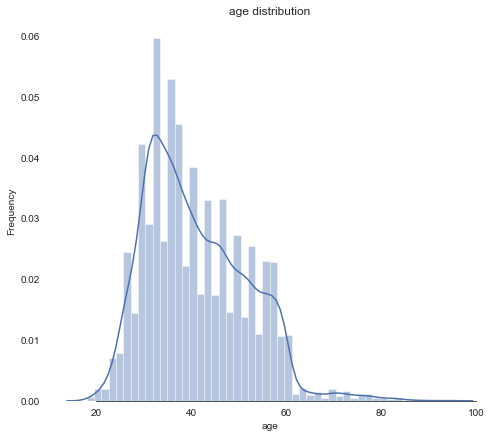

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['age'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="age")
ax.set(title="age distribution")
sns.despine(trim=True, left=True)
plt.show()

In [46]:
# 年龄分类-五类

df.loc[df['age'] <= 22, 'age'] = 0
df.loc[(df['age'] > 22) & (df['age'] <= 32), 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 48), 'age'] = 2
df.loc[(df['age'] > 48) & (df['age'] <= 64), 'age'] = 3
df.loc[df['age'] > 64, 'age'] = 4

In [47]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,2,4,1,2,0,291,1,0,2,150,2,0,0,3,0
1,2,2,9,0,0,0,5076,1,0,0,99,1,251,2,1,0
2,3,2,0,1,1,0,104,1,1,0,77,2,0,0,3,0
3,4,1,4,2,1,0,-994,1,1,0,174,2,0,0,3,0
4,5,2,9,0,1,0,2974,1,0,2,187,5,0,0,3,0


/Users/nick/.venv/ML-training/lib/python3.6/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


精确率和召回率（随机森林）：               precision    recall  f1-score   support

        非高收入       0.93      0.95      0.94      5632
         高收入       0.52      0.41      0.45       698

    accuracy                           0.89      6330
   macro avg       0.72      0.68      0.70      6330
weighted avg       0.88      0.89      0.89      6330

准确率（随机森林）：0.8925750394944708
auc值为：0.8154678444093514


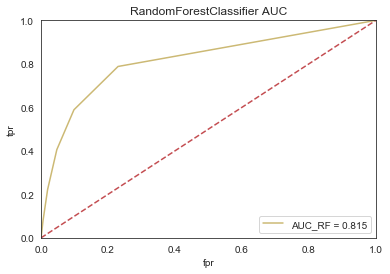

In [55]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.linear_model.logistic import LogisticRegression

df = df.drop("ID", axis=1)

model_list = []

x,y = split_column(df, "y")

# =============随机森林==============
# 数据集分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=24)
# 转换为字典数据，并进行特征抽取
dc = DictVectorizer(sparse=False)
x_train = dc.fit_transform(x_train.to_dict(orient="records"))
# print(dc.get_feature_names())
x_test = dc.transform(x_test.to_dict(orient="records"))
# estimator
rf = RandomForestClassifier(n_estimators=5)
rf.fit(x_train, y_train)
# 预测
print("精确率和召回率（随机森林）：", classification_report(y_test, rf.predict(x_test), labels=[0, 1], target_names=["非高收入", "高收入"]))
pre_score = rf.score(x_test, y_test)
print("准确率（随机森林）：{}".format(pre_score))
# 输出概率
predictions = rf.predict_proba(x_test)
# 计算auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions[:, 1])
auc_value = metrics.auc(fpr, tpr)
print("auc值为：{}".format(auc_value))
model_list.append({"model": rf, "auc": auc_value})
# 绘图
plt.title('RandomForestClassifier AUC')
plt.plot(fpr, tpr, 'y', label='AUC_RF = %0.3f' % auc_value)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.savefig("./count_auc.png")

   age  job  marital  education  default  balance  housing  loan  contact  \
0    2    4        1          2        0      291        1     0        2   
1    2    9        0          0        0     5076        1     0        0   
2    2    0        1          1        0      104        1     1        0   
3    1    4        2          1        0     -994        1     1        0   
4    2    9        0          1        0     2974        1     0        2   

   duration  campaign  pdays  previous  poutcome  
0       150         2      0         0         3  
1        99         1    251         2         1  
2        77         2      0         0         3  
3       174         2      0         0         3  
4       187         5      0         0         3  
   y
0  0
1  0
2  0
3  0
4  0
精确率和召回率（xgboost）：               precision    recall  f1-score   support

        非高收入       1.00      1.00      1.00      5632
         高收入       1.00      0.99      0.99       698

    accuracy       

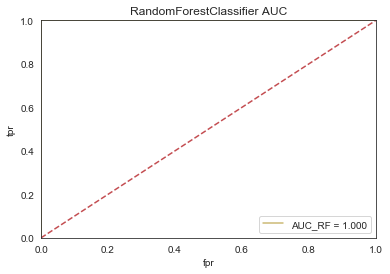

In [61]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.linear_model.logistic import LogisticRegression

import xgboost

# df = df.drop("ID", axis=1)

model_list = []

x,y = split_column(df, "y")

# =============随机森林==============
# 数据集分割
print(x.head())
print(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=24)





# 拟合XGBoost模型
rf = xgboost.XGBClassifier(max_depth=30, learning_rate=0.1, n_estimators=100,
                              min_child_weight=1, gamma=0,
                              subsample=1, colsample_bytree=1,
                              scale_pos_weight=1, random_state=27)

rf.fit(x, y)



# 预测
print("精确率和召回率（xgboost）：", classification_report(y_test, rf.predict(x_test), labels=[0, 1], target_names=["非高收入", "高收入"]))
pre_score = rf.score(x_test, y_test)
print("准确率（xgboost）：{}".format(pre_score))
# 输出概率
predictions = rf.predict_proba(x_test)
# 计算auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions[:, 1])
auc_value = metrics.auc(fpr, tpr)
print("auc值为：{}".format(auc_value))
model_list.append({"model": rf, "auc": auc_value})
# 绘图
plt.title('RandomForestClassifier AUC')
plt.plot(fpr, tpr, 'y', label='AUC_RF = %0.3f' % auc_value)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.savefig("./count_auc.png")

In [52]:
data2 = pd.read_csv("/Users/nick/Documents/dataset/bank_precision_marketing/bank_pm_test_set.csv")

data2.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


In [65]:
data2 = pd.read_csv("/Users/nick/Documents/dataset/bank_precision_marketing/bank_pm_test_set.csv")
data2.head()
ID = data2["ID"]

data2 = data2.drop(["ID", "day", "month"], axis=1)



data2.loc[df.pdays == -1, 'pdays'] = 0  # 关键句
check_classifier_value(data2, "pdays", -1)
check_classifier_value(data2, "pdays", 0)


data2 = dumb_columns(data2)


# 年龄分类-五类

data2.loc[data2['age'] <= 22, 'age'] = 0
data2.loc[(data2['age'] > 22) & (data2['age'] <= 32), 'age'] = 1
data2.loc[(data2['age'] > 32) & (data2['age'] <= 48), 'age'] = 2
data2.loc[(data2['age'] > 48) & (data2['age'] <= 64), 'age'] = 3
data2.loc[data2['age'] > 64, 'age'] = 4


pred = rf.predict_proba(data2)
data3 = pd.DataFrame(pred, index=ID, columns=['pred0', 'pred'])
data3.drop('pred0', axis=1, inplace=True)
data3.to_csv('/Users/nick/Documents/dataset/bank_precision_marketing/result.csv')


10852
[{'字段名称': -1, '数量': 8875}]
10852
[]
